In [1]:
import pandas as pd
import numpy as np
from pyalex import Works
import pyalex
pyalex.config.email = "tarakomarecity@gmail.com"

flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [2]:
pager = Works().filter(concepts={"id": "C2982795734"})\
            .select(["id", "title", "publication_year", "authorships", "referenced_works"]).paginate(per_page=200, n_max=None)

works_json = []
for page in pager:
    for item in page:
        works_json.append(item)
    print(len(works_json))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19506
19506


In [3]:
works_json

[{'id': 'https://openalex.org/W1995039629',
  'title': 'Trust and Sources of Health Information',
  'publication_year': 2005,
  'authorships': [{'author_position': 'first',
    'author': {'id': 'https://openalex.org/A5024719663',
     'display_name': 'Bradford W. Hesse',
     'orcid': 'https://orcid.org/0000-0003-1142-1161'},
    'institutions': [],
    'countries': [],
    'is_corresponding': False,
    'raw_author_name': 'Bradford W. Hesse',
    'raw_affiliation_string': '',
    'raw_affiliation_strings': []},
   {'author_position': 'middle',
    'author': {'id': 'https://openalex.org/A5008446352',
     'display_name': 'David E. Nelson',
     'orcid': 'https://orcid.org/0000-0001-9325-7208'},
    'institutions': [],
    'countries': [],
    'is_corresponding': False,
    'raw_author_name': 'David E. Nelson',
    'raw_affiliation_string': 'Centers for Disease Control and Prevention.',
    'raw_affiliation_strings': ['Centers for Disease Control and Prevention.']},
   {'author_position

In [4]:
years = pd.Series(
    {work['id']: work['publication_year'] for work in works_json},
    name='year'
)
years.index.name = 'eid'

citations_data = []
for work in works_json:
    target_id = work['id']
    for referenced_work in work['referenced_works']:
        citations_data.append({'source': referenced_work, 'target': target_id})
citations_df = pd.DataFrame(citations_data)

team_sizes = pd.Series(
    {work['id']: len(work['authorships']) for work in works_json},
    name='team_size'
)
team_sizes.index.name = 'eid'

display(years, citations_df, team_sizes)

eid
https://openalex.org/W1995039629    2005
https://openalex.org/W2150943872    2001
https://openalex.org/W2150217040    2011
https://openalex.org/W2143607388    2006
https://openalex.org/W2152066760    2003
                                    ... 
https://openalex.org/W4302605504    1993
https://openalex.org/W625937919     1993
https://openalex.org/W647161808     1993
https://openalex.org/W649524032     1993
https://openalex.org/W65286626      1993
Name: year, Length: 19503, dtype: int64

source                            target
0        https://openalex.org/W108866545  https://openalex.org/W1995039629
1        https://openalex.org/W110761783  https://openalex.org/W1995039629
2        https://openalex.org/W148928321  https://openalex.org/W1995039629
3        https://openalex.org/W191676238  https://openalex.org/W1995039629
4        https://openalex.org/W256843494  https://openalex.org/W1995039629
...                                  ...                               ...
178237  https://openalex.org/W2414580450  https://openalex.org/W2189060859
178238  https://openalex.org/W2464413044  https://openalex.org/W2189060859
178239  https://openalex.org/W2994583085  https://openalex.org/W2189060859
178240  https://openalex.org/W3192693530  https://openalex.org/W2189060859
178241  https://openalex.org/W1533465488   https://openalex.org/W625937919

[178242 rows x 2 columns]

eid
https://openalex.org/W1995039629     7
https://openalex.org/W2150943872    13
https://openalex.org/W2150217040     4
https://openalex.org/W2143607388     1
https://openalex.org/W2152066760     2
                                    ..
https://openalex.org/W4302605504     0
https://openalex.org/W625937919      1
https://openalex.org/W647161808      1
https://openalex.org/W649524032      1
https://openalex.org/W65286626       1
Name: team_size, Length: 19503, dtype: int64

In [5]:
def citation_groupby(df_citation):
    '''source,targetのDataFrameを引用先，引用元ごとにgroupby
    
    input: source,targetをcolumnにもつedgeのDataFrame

    index: eid
    source: indexが引用先となる論文群(新)
    target: indexが引用元となる論文群(旧)
    '''
    
    citations_source_gp = df_citation.groupby('source').agg(list)
    citations_target_gp = df_citation.groupby('target').agg(list)
    df_citation_gp = pd.concat([citations_source_gp,citations_target_gp],axis = 1)
    return df_citation_gp

citations_gb = citation_groupby(citations_df)
citations_gb

target  \
https://openalex.org/W1000811874  [https://openalex.org/W2462053516]   
https://openalex.org/W100159190    [https://openalex.org/W280761230]   
https://openalex.org/W1002173171  [https://openalex.org/W1868288649]   
https://openalex.org/W100422604   [https://openalex.org/W1133885182]   
https://openalex.org/W1005488051  [https://openalex.org/W2762769839]   
...                                                              ...   
https://openalex.org/W97558588                                   NaN   
https://openalex.org/W98423603                                   NaN   
https://openalex.org/W989885760                                  NaN   
https://openalex.org/W99122090                                   NaN   
https://openalex.org/W994275968                                  NaN   

                                                                             source  
https://openalex.org/W1000811874                                                NaN  
https://openalex.org/W100159190                                                 NaN  
https://openalex.org/W1002173171                                                NaN  
https://openalex.org/W100422604                                                 NaN  
https://openalex.org/W1005488051                                                NaN  
...                                                                             ...  
https://openalex.org/W97558588    [https://openalex.org/W1528805892, https://ope...  
https://openalex.org/W98423603    [https://openalex.org/W1983772309, https://ope...  
https://openalex.org/W989885760   [https://openalex.org/W2068402150, https://ope...  
https://openalex.org/W99122090    [https://openalex.org/W1975599536, https://ope...  
https://openalex.org/W994275968   [https://openalex.org/W106609810, https://open...  

[101462 rows x 2 columns]

In [6]:
def get_score(node):
    try:
        node_r = set(citations_gb.target.loc[node])
        node_r_c = set(flatten2([citations_gb.source.loc[x] for x in node_r])) - set([node])
        node_c = set(citations_gb.source.loc[node])
        allnodes = node_c | node_r_c
        cite_target = node_c - node_r_c
        cite_targetref = node_r_c - node_c
        cite_target_targetref_both = node_r_c & node_c
        score = (len(cite_target)*1 + len(cite_target_targetref_both)*-1 + len(cite_targetref)*0)/len(allnodes)
        return score
    except:
        return None

In [7]:
#eids = citations_gb.index

#from multiprocessing import Pool
#P = Pool(20)
#res = P.map(get_score,eids)
#P.terminate()
#P.close()
#scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
#display(scores, scores[scores[1].notna()])

#scores.index = scores[0]
#scores['year'] = scores[0].map(years)
#display(scores)

In [8]:
eids = citations_gb.index

res = []
for eid in eids:
    res.append(get_score(eid))
scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
display(scores, scores[scores[1].notna()])

scores.index = scores[0]
scores['team_size'] = scores[0].map(team_sizes)
display(scores)

0   1
0       https://openalex.org/W1000811874 NaN
1        https://openalex.org/W100159190 NaN
2       https://openalex.org/W1002173171 NaN
3        https://openalex.org/W100422604 NaN
4       https://openalex.org/W1005488051 NaN
...                                  ...  ..
101457    https://openalex.org/W97558588 NaN
101458    https://openalex.org/W98423603 NaN
101459   https://openalex.org/W989885760 NaN
101460    https://openalex.org/W99122090 NaN
101461   https://openalex.org/W994275968 NaN

[101462 rows x 2 columns]

0         1
9      https://openalex.org/W1007790680  0.037209
37      https://openalex.org/W102279299  0.190476
78     https://openalex.org/W1042794463  0.017391
80     https://openalex.org/W1043830453  0.275000
102     https://openalex.org/W105789003 -0.004082
...                                 ...       ...
96048   https://openalex.org/W872936422  0.292683
96049    https://openalex.org/W87426966  0.047619
96088     https://openalex.org/W8971915  0.132353
96197    https://openalex.org/W96732384 -0.005650
96238    https://openalex.org/W98698602  0.090909

[3236 rows x 2 columns]

0   1  \
0                                                                        
https://openalex.org/W1000811874  https://openalex.org/W1000811874 NaN   
https://openalex.org/W100159190    https://openalex.org/W100159190 NaN   
https://openalex.org/W1002173171  https://openalex.org/W1002173171 NaN   
https://openalex.org/W100422604    https://openalex.org/W100422604 NaN   
https://openalex.org/W1005488051  https://openalex.org/W1005488051 NaN   
...                                                            ...  ..   
https://openalex.org/W97558588      https://openalex.org/W97558588 NaN   
https://openalex.org/W98423603      https://openalex.org/W98423603 NaN   
https://openalex.org/W989885760    https://openalex.org/W989885760 NaN   
https://openalex.org/W99122090      https://openalex.org/W99122090 NaN   
https://openalex.org/W994275968    https://openalex.org/W994275968 NaN   

                                  team_size  
0                                            
https://openalex.org/W1000811874        NaN  
https://openalex.org/W100159190         NaN  
https://openalex.org/W1002173171        NaN  
https://openalex.org/W100422604         NaN  
https://openalex.org/W1005488051        NaN  
...                                     ...  
https://openalex.org/W97558588          1.0  
https://openalex.org/W98423603          2.0  
https://openalex.org/W989885760         1.0  
https://openalex.org/W99122090          5.0  
https://openalex.org/W994275968         3.0  

[101462 rows x 3 columns]

In [9]:
scores_notna = scores[scores[1].notna() & scores['team_size'].notna()].drop(columns=0)
scores_notna

1  team_size
0                                                    
https://openalex.org/W1007790680  0.037209        3.0
https://openalex.org/W102279299   0.190476        1.0
https://openalex.org/W1042794463  0.017391        2.0
https://openalex.org/W1043830453  0.275000        3.0
https://openalex.org/W105789003  -0.004082       13.0
...                                    ...        ...
https://openalex.org/W872936422   0.292683        2.0
https://openalex.org/W87426966    0.047619       12.0
https://openalex.org/W8971915     0.132353        2.0
https://openalex.org/W96732384   -0.005650        4.0
https://openalex.org/W98698602    0.090909        6.0

[3236 rows x 2 columns]

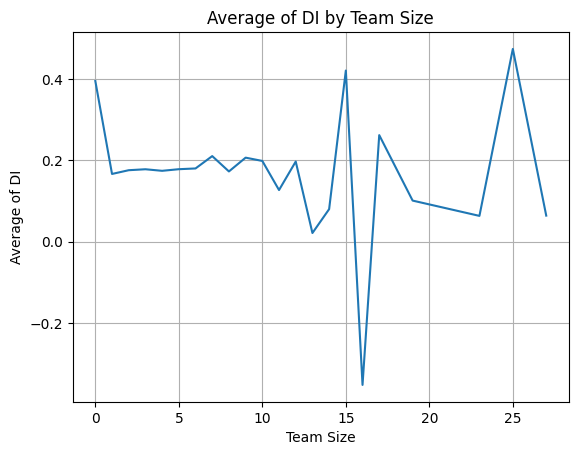

In [10]:
import matplotlib.pyplot as plt

# team_sizeごとにグループ化
grouped_df = scores_notna.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()